<a href="https://colab.research.google.com/github/HaniyeDousti/Machine-Learning-Project/blob/main/Softmax2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

**Load Data**

In [ ]:
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.25)

m = X_train.shape[0]

X = np.hstack((np.ones((m, 1)), X_train))

In [ ]:
k = np.unique(iris_data.target)
k.sort()

Y = np.zeros((m, len(k)))

for cls in k.astype(int):
  Y[np.where(y_train[:] == cls), cls] = 1

**Softmax Function**

In [ ]:
def softmax(z):
  return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(z.shape[0], 1)

**Softmax Regression Implementation**

In [ ]:
#define theta with size 3,5 as there are 3 classes and 5 features, lets take the initial value as 0
theta = np.zeros((3,5))

#Learning rate
learning_rate = 0.001

#cost values
cost_arr = []

#no of iterations we want our model to be trained
no_of_iteration = 50000

#counter
i = 0

for i in range(no_of_iteration):

  #model function
  lineq = np.dot(X, theta.T)
  h = softmax(lineq)

  #cost function
  cost = -np.sum(Y * np.log(h)) / m
  cost_arr.append(cost)

  # using gradient calculate new theta
  delta = (learning_rate/m) * np.dot((h-Y).T, X)
  theta = theta - delta

  i = i + 1



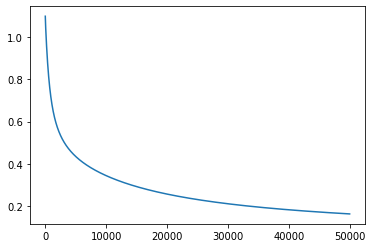

In [ ]:
plt.plot(cost_arr)
plt.show()

**Prediction on test data**

In [ ]:
m_test = X_test.shape[0]

X_test = np.hstack((np.ones((m_test, 1)), X_test))

probab = softmax(np.dot(X_test, theta.T))
predict = np.argmax(probab, axis=1)


In [ ]:
predict

array([1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0,
       1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1])

**Comparing our model with scikit library**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score, accuracy_score


In [ ]:
regr = linear_model.LogisticRegression()
regr.fit(X, y_train)

sklearn_predict = regr.predict(X_test)

print('Sklearn')

#Coefficients
print('Coefficients: {}'.format(regr.coef_))

#Accuracy Score
print('Accuracy Score: %.2f % accuracy_score(sklearn_predict, y_test)')

#The mean squared score
print("Mean squared error: %.2f" % mean_squared_error(sklearn_predict, y_test))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % explained_variance_score(y_test, sklearn_predict))

print('\n')
print('Our Model')

#coefficients
print('Coefficients: {}'.format(theta))

# Accuracy score
print("Accuracy score: %.2f" % accuracy_score(predict, y_test))

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(predict, y_test))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % explained_variance_score(y_test, predict))


Sklearn
Coefficients: [[ 2.67822805e-04 -4.16060825e-01  8.30971569e-01 -2.31380262e+00
  -9.92852223e-01]
 [-2.97128582e-04  4.94196535e-01 -4.52474888e-01 -1.83625182e-01
  -7.98769286e-01]
 [ 2.93057770e-05 -7.81357100e-02 -3.78496681e-01  2.49742780e+00
   1.79162151e+00]]
Accuracy Score: %.2f % accuracy_score(sklearn_predict, y_test)
Mean squared error: 0.05
Variance score: 0.92


Our Model
Coefficients: [[ 0.32697675  0.66545793  1.59753057 -2.21521924 -1.02078597]
 [ 0.33850437  0.59625848 -0.35640086  0.02740613 -0.86805935]
 [-0.66548112 -1.26171641 -1.24112971  2.18781312  1.88884531]]
Accuracy score: 0.95
Mean squared error: 0.05
Variance score: 0.92


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
